# PREGUNTA 2

## IMPORTANDO LIBRERIAS

In [81]:
# utilizado para manejos de directorios y rutas
import os
# Computacion vectorial y cientifica para python
import numpy as np
# Librerias para graficación (trazado de gráficos)
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D  # Necesario para graficar superficies 3D
# llama a matplotlib a embeber graficas dentro de los cuadernillos
%matplotlib inline


from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [82]:
# Cargar datos
#data = np.loadtxt(os.path.join('Datasets', 'capacidad_adquisitiva.csv'), delimiter=';')
#from numpy import genfromtxt
#data = genfromtxt(os.path.join('Datasets', 'capacidad_adquisitiva.csv'), delimiter=';')
data = np.loadtxt('/content/drive/MyDrive/SIS420-INTELIGENCIA_ARTIFICIAL/DATASETs/tiroides.csv', delimiter=",",skiprows=0)
#print(data)
X = data[:,:-1]
y = data[:, 5]
m = y.size
print(X[0])
print(y)
m


[107.   10.1   2.2   0.9   2.7]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 3. 3. 3. 3. 3. 3. 3.
 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3.]


215

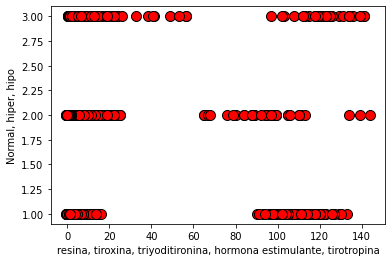

In [83]:
def plotData(x, y):
    #Grafica los puntos x e y en una figura nueva. 
    
    fig = pyplot.figure()  # abre una nueva figura
    
    pyplot.plot(x, y, 'ro', ms=10, mec='k')
    pyplot.ylabel('Normal, hiper, hipo')
    pyplot.xlabel('resina, tiroxina, triyoditironina, hormona estimulante, tirotropina')
plotData(X, y)

## NORMALIZACION
los datos que tiene la regresion lineal hacen que se dificil converger y por ende se usa la normalizacion.
Las X se ponen en un rango similar es decir 0<X<10  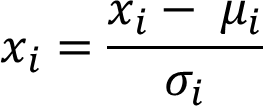

In [84]:
def  featureNormalize(X):
    X_norm = X.copy()
    mu = np.zeros(X.shape[1])
    sigma = np.zeros(X.shape[1])

    mu = np.mean(X, axis = 0)
    sigma = np.std(X, axis = 0)
    X_norm = (X - mu) / sigma
    
    return X_norm, mu, sigma

In [85]:
# llama featureNormalize con los datos cargados
X_norm, mu, sigma = featureNormalize(X)

print(X)
print('Media calculada:', mu)
print('Desviación estandar calculada:', sigma)
print(X_norm)

[[107.   10.1   2.2   0.9   2.7]
 [113.    9.9   3.1   2.    5.9]
 [127.   12.9   2.4   1.4   0.6]
 ...
 [103.    5.1   1.4   1.2   5. ]
 [ 97.    4.7   1.1   2.1  12.6]
 [102.    5.3   1.4   1.3   6.7]]
Media calculada: [109.59534884   9.80465116   2.05023256   2.88         4.19906977]
Desviación estandar calculada: [13.11484076  4.6864254   1.41618138  6.10378609  8.05172806]
[[-0.19789404  0.0630222   0.10575442 -0.32438883 -0.18617988]
 [ 0.25960294  0.02034575  0.74126623 -0.14417281  0.21125033]
 [ 1.32709588  0.6604925   0.24697927 -0.24247246 -0.44699346]
 ...
 [-0.50289203 -1.00388905 -0.45914497 -0.275239    0.09947309]
 [-0.960389   -1.08924195 -0.67098224 -0.12778954  1.04336984]
 [-0.57914152 -0.9612126  -0.45914497 -0.25885573  0.31060789]]


In [86]:
# Añade el termino de interseccion a X
# (Columna de unos para X0)
X = np.concatenate([np.ones((m, 1)), X_norm], axis=1)
X

array([[ 1.        , -0.19789404,  0.0630222 ,  0.10575442, -0.32438883,
        -0.18617988],
       [ 1.        ,  0.25960294,  0.02034575,  0.74126623, -0.14417281,
         0.21125033],
       [ 1.        ,  1.32709588,  0.6604925 ,  0.24697927, -0.24247246,
        -0.44699346],
       ...,
       [ 1.        , -0.50289203, -1.00388905, -0.45914497, -0.275239  ,
         0.09947309],
       [ 1.        , -0.960389  , -1.08924195, -0.67098224, -0.12778954,
         1.04336984],
       [ 1.        , -0.57914152, -0.9612126 , -0.45914497, -0.25885573,
         0.31060789]])

## DECENSO POR EL GRADIENTE
$$ J(\theta) = \frac{1}{2m}(X\theta - \vec{y})^T(X\theta - \vec{y}) $$

In [87]:
def computeCostMulti(X, y, theta):
    # Inicializa algunos valores utiles
    m = y.shape[0] # numero de ejemplos de entrenamiento
    
    J = 0
    
    h = np.dot(X, theta)
    
    J = (1/(2 * m)) * np.sum(np.square(np.dot(X, theta) - y))
    
    return J


def gradientDescentMulti(X, y, theta, alpha, num_iters):
    
    # Inicializa algunos valores 
    m = y.shape[0] # numero de ejemplos de entrenamiento
    
    # realiza una copia de theta, el cual será acutalizada por el descenso por el gradiente
    theta = theta.copy()
    
    J_history = []
    
    for i in range(num_iters):
        theta = theta - (alpha / m) * (np.dot(X, theta) - y).dot(X)
        J_history.append(computeCostMulti(X, y, theta))
    
    return theta, J_history

## APRENDIZAJE

In [88]:
def resultados(num):
  valor ={
      1: 'Normal',
      2: 'Hiper',
      3: 'Hipo',
  } 
  return valor.get(num, 'Desconocido')

theta calculado por el descenso por el gradiente: [1.44179533 0.02257431 0.02689929 0.19100649 0.32925261 0.26104103]
prediccion:  2
El resultado de la prueba de tiroides (usando el descenso por el gradiente) determina que la persona esta:  Hiper


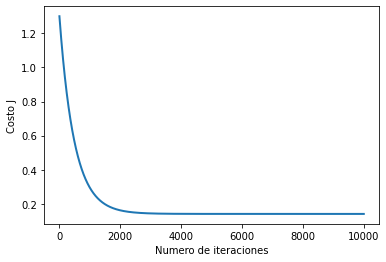

In [90]:
# Elegir algun valor para alpha (probar varias alternativas)
alpha = 0.001 # alpha = 0.003
num_iters = 10000

# inicializa theta y ejecuta el descenso por el gradiente
theta = np.zeros(6)
theta, J_history = gradientDescentMulti(X, y, theta, alpha, num_iters)

# Grafica la convergencia del costo
pyplot.plot(np.arange(len(J_history)), J_history, lw=2)
pyplot.xlabel('Numero de iteraciones')
pyplot.ylabel('Costo J')

# Muestra los resultados del descenso por el gradiente
print('theta calculado por el descenso por el gradiente: {:s}'.format(str(theta)))

# SE estima con los resultados
""" 
2: prueba de absorción de resina T3. (Un porcentaje)
3: tiroxina sérica total medida por el isótopo
método de desplazamiento.
4: Triyodotironina sérica total medida por radioinmuno
ensayo.
5: hormona estimulante de la tiroides basal (TSH) medida por
ensayo radioinmunológico.
6: Diferencia absoluta máxima del valor de TSH después de la inyección de
200 microgramos de hormona liberadora de tirotropina en comparación
al valor basal. """
X_array = [1, 139,16.4,3.8,1.1,-0.2]
X_array[1:6] = (X_array[1:6] - mu) / sigma
resultado = round(np.dot(X_array, theta))  
print('prediccion: ', resultado)
print('El resultado de la prueba de tiroides (usando el descenso por el gradiente) determina que la persona esta: ', resultados(resultado) )

## ECUACION NORMAL
$$ \theta = \left( X^T X\right)^{-1} X^T\vec{y}$$

In [91]:
# Cargar datos
data = np.loadtxt('/content/drive/MyDrive/SIS420-INTELIGENCIA_ARTIFICIAL/DATASETs/tiroides.csv', delimiter=",",skiprows=0)
#print(data)
X = data[:,:-1]
y = data[:, 5]
m = y.size
X = np.concatenate([np.ones((m, 1)), X], axis=1)

In [92]:
def normalEqn(X, y):
  
    theta = np.zeros(X.shape[1])
    
    theta = np.dot(np.dot(np.linalg.inv(np.dot(X.T,X)),X.T),y)
    
    return theta

In [94]:
# Calcula los parametros con la ecuación de la normal
theta = normalEqn(X, y);

# Muestra los resultados optenidos a partir de la aplicación de la ecuación de la normal
print('Theta calculado a partir de la ecuación de la normal: {:s}'.format(str(theta)));

# Estimar el resultado de las pruebas

X_array = [1, 139,16.4,3.8,1.1,-0.2]
tiroides = round(np.dot(X_array, theta) )
print(tiroides)
print('El resultado de las pruebas realizadas es de: ', resultados(tiroides))

Theta calculado a partir de la ecuación de la normal: [0.6242507  0.00177609 0.00532644 0.13640222 0.05392436 0.03233492]
2
El resultado de las pruebas realizadas es de:  Hiper
